# Logistic Regression
In this notebook I use two logistic regression models to perform a basic classification task on the popular Wisconsin Breast Cancer dataset. The first model is simply an implemetation of logistic regression using the sklearn librarie. The second model is my own from scratch implemetation of logistic regression. 
The dataset can be found here: [UCI: breast cancer wisconsin diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

To begin with I import the data and perform some standard EDA, and visualisation. Following on from this I create the two models, train them then compare their predictive performance with one another.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Importing the Dataset

In [2]:
headers = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

dataset = pd.read_csv('wdbc.data', names = headers)

# So according to the dataset documentation there should be:
# - No missing values.
# - First row is an ID row.
# - 30 Continous features.
# - 1 Categoracal target.
# - & We should be aiming at an accuracy of around 95% with a logistic regression model.

## EDA

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# The first column is just an id column so I will drop that.
dataset.drop('id', axis = 1, inplace = True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# This prints the column names and gives us an overview of the data type assoicated with each column and highlights nulls.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# We will just double check for null values beacuse why not.
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
dataset.describe(include = 'O').T

,count,unique,top,freq
diagnosis,569,2,B,357


In [9]:
dataset.diagnosis.replace({'M': 1, 'B': 0}, inplace = True)
dataset['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Visualisations

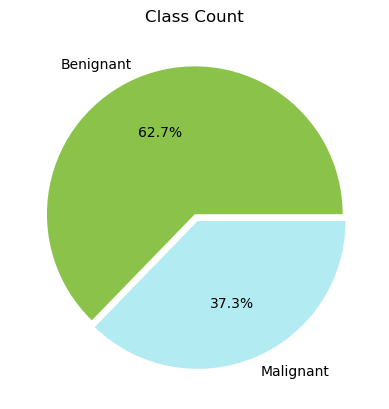

In [10]:
result = dataset['diagnosis'].value_counts()
colors = ['#8BC34A','#B2EBF2']
plt.pie(result, colors = colors, explode = [0, .05],  labels=['Benignant', 'Malignant'], autopct='%1.1f%%')
plt.title('Class Count')
plt.show()

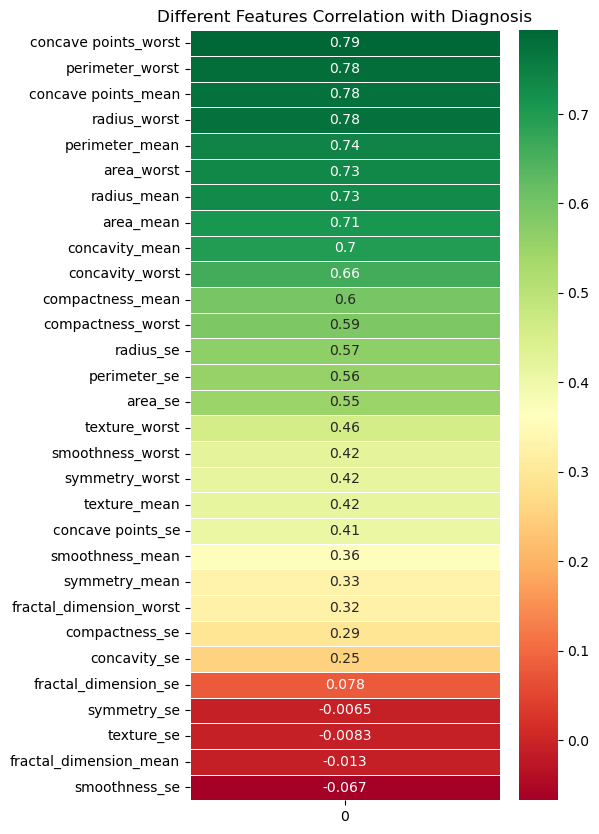

In [11]:
datacorr = dataset.iloc[:, 1:].corrwith(dataset['diagnosis']).sort_values(ascending=False).to_frame()
fig, ax = plt.subplots(figsize = (5,10))
plt.title('Different Features Correlation with Diagnosis')
sns.heatmap(datacorr, annot= True, linewidths=.4,cbar=True, cmap = 'RdYlGn')
plt.show()

In [12]:
# I will drop the bottom 6 variables beacuse they dont really have any correlation between them and the target vaiable.
dataset.drop(columns = datacorr.index[-5:], inplace=True)

In [13]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

## Splitting the Data into a Training set, Test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

## Training the Model: SKLEARN

In [16]:
classifier = LogisticRegression(penalty= 'l2')
classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
yHat = classifier.predict(X_test)

## Confusion Matrix & Accuracy

In [18]:
cm = confusion_matrix(y_test, yHat)
print(cm)

[[70  1]
 [ 1 42]]


In [19]:
accuracy_score(yHat, y_test)

0.9824561403508771

## K-Cross Fold Validation

In [20]:
accuracys = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f"Accuracy: {accuracys.mean()*100:.2f} %")
print(f"Standard Deviation: {accuracys.std()*100:.2f}")

Accuracy: 97.59 %
Standard Deviation: 2.06


## Logistic Regression from Scratch

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [41]:
def cost_function(X, y, W, b):
    m = len(y)
    h = sigmoid(np.dot(X, W) + b)
    epsilon = 1e-5
    cost = (1/m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    return cost

In [42]:
W = np.zeros(X_train.shape[1])
b = 0

In [50]:
W = classifier.coef_.T

In [47]:
b = classifier.intercept_

In [51]:
yHat = sigmoid(np.dot(X_test, W) + b)

In [68]:
yHat = np.around(yHat).reshape(114, )

In [69]:
accuracy_score(y_test, yHat)

0.9824561403508771